# New York City 5 Boroughs Crimes Data  
  
  
This data has been gathered from https://www.kaggle.com/adamschroeder/crimes-new-york-city.
  
This dataset has a second file provided that provides each of the 5 borough population metrics by decade from 1950 with projections through 2040.
  
Additional Considerations:
 - weather data to see how weather affects crime
 - Unemployment statistics
  
Dataset has 1,048,575  observations with 24 columns  
  
|Variable Label|Variable Type|Data Description|
| :-|:-|:-|
|CMPLNT_NUM||	Randomly generated persistent ID for each complaint |
|CMPLNT_FR_DT||	Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)|
|CMPLNT_FR_TM||	Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)|
|CMPLNT_TO_DT||	Ending date of occurrence for the reported event, if exact time of occurrence is unknown|
|CMPLNT_TO_TM||	Ending time of occurrence for the reported event, if exact time of occurrence is unknown|
|RPT_DT||	Date event was reported to police |
|KY_CD||	Three digit offense classification code|
|OFNS_DESC	||Description of offense corresponding with key code|
|PD_CD	||Three digit internal classification code (more granular than Key Code)|
|PD_DESC||	Description of internal classification corresponding with PD code (more granular than Offense Description)|
|CRM_ATPT_CPTD_CD||	Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely|
|LAW_CAT_CD||	Level of offense: felony, misdemeanor, violation |
|JURIS_DESC||	Jurisdiction responsible for incident. Either internal, like Police, Transit, and Housing; or external, like Correction, Port Authority, etc.|
|BORO_NM	||The name of the borough in which the incident occurred|
|ADDR_PCT_CD	||The precinct in which the incident occurred|
|LOC_OF_OCCUR_DESC||	Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of|
|PREM_TYP_DESC||	Specific description of premises; grocery store, residence, street, etc.|
|PARKS_NM	||Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)|
|HADEVELOPT||	Name of NYCHA housing development of occurrence, if applicable|
|X_COORD_CD||	X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|
|Y_COORD_CD||	Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|
|Latitude||	Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) |
|Longitude||	Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)|


### EDA Plan:

1.  Clean up variable types
2.  Add variables for day of week, month and year based on date variables  
3.  Add times of day or shift allocations to time variable

#### Weather Data

Weather data was captured from https://www.ncdc.noaa.gov/.  I pulled all weather data from 2010 to 2020 and set the location as Central Park Station.  

Variables captured are described as follows:

|Variable code|Description|Unit of Measure|
|:-|:-|:-|
|PRCP|Precipitation|Inches|
|SNOW|Snowfall|Inches|
|TMAX|Maximum temperature|Fahrenheit|
|TMIN|Minimum temperature|Fahrenheit|

### Follow Up Items:

1. I need to redirect the csv file to the github repo directly once I post it there.  I should be able to copy the logic from this (df = pd.read_csv('https://raw.githubusercontent.com/eclarson/DataMiningNotebooks/master/data/titanic.csv') # read in the csv file) read in from Dr. Larsen to do so.  I need first to make available the full dataset on the github for it to work.  I don't know if by posting the file I will interfere with the team, so I need to ask/research that.  For now, I'll work locally off the datafile and push only the notebook


In [1]:
import pandas as pd

df = pd.read_csv('NYPD_Complaint_Data_Historic.csv') # read in the csv %%file

C:\Users\sabrina.purvis\Anaconda3\envs\ML7331\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [10]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CMPLNT_NUM         1048575 non-null  int64  
 1   CMPLNT_FR_DT       1048510 non-null  object 
 2   CMPLNT_FR_TM       1048575 non-null  object 
 3   CMPLNT_TO_DT       842616 non-null   object 
 4   CMPLNT_TO_TM       843002 non-null   object 
 5   RPT_DT             1048575 non-null  object 
 6   KY_CD              1048575 non-null  int64  
 7   OFNS_DESC          1045695 non-null  object 
 8   PD_CD              1047842 non-null  float64
 9   PD_DESC            1047842 non-null  object 
 10  CRM_ATPT_CPTD_CD   1048574 non-null  object 
 11  LAW_CAT_CD         1048575 non-null  object 
 12  JURIS_DESC         1048575 non-null  object 
 13  BORO_NM            1048575 non-null  object 
 14  ADDR_PCT_CD        1048574 non-null  float64
 15  LOC_OF_OCCUR_DESC  830823 non-nu

In [11]:
df.describe()

,CMPLNT_NUM,KY_CD,PD_CD,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.048575e+06,1.048575e+06,1.047842e+06,1.048574e+06,1.016158e+06,1.016158e+06,1.016158e+06,1.016158e+06
mean,5.497027e+08,2.953382e+02,4.099135e+02,6.380729e+01,1.004983e+06,2.067818e+05,4.073420e+01,-7.392516e+01
std,2.598666e+08,1.505240e+02,2.192328e+02,3.434066e+01,2.146524e+04,3.043238e+04,8.353300e-02,7.741049e-02
min,1.000007e+08,1.010000e+02,1.010000e+02,1.000000e+00,9.133190e+05,1.210800e+05,4.049877e+01,-7.425508e+01
25%,3.244583e+08,1.170000e+02,2.540000e+02,4.000000e+01,9.919982e+05,1.839220e+05,4.067144e+01,-7.397206e+01
50%,5.494480e+08,3.410000e+02,3.570000e+02,6.600000e+01,1.004598e+06,2.053300e+05,4.073021e+01,-7.392661e+01
75%,7.746526e+08,3.510000e+02,6.370000e+02,9.400000e+01,1.016552e+06,2.348090e+05,4.081116e+01,-7.388336e+01
max,9.999996e+08,8.810000e+02,9.750000e+02,1.230000e+02,1.067226e+06,2.718200e+05,4.091272e+01,-7.370058e+01


In [26]:
df['year'] = pd.DatetimeIndex(df['CMPLNT_FR_DT']).year

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1015-12-04 00:00:00

In [19]:
import matplotlib.pyplot as plt

I am going to try and map the lat/longitude for a specific crime

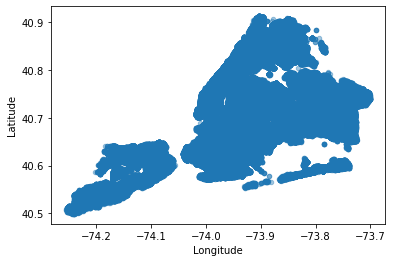

In [20]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)
plt.show()

In [21]:
#finding the boundary box - used to overlay points on a city map
#code source:  https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

df.Longitude.min()

-74.25507554

In [22]:
df.Longitude.max()

-73.70057651

In [23]:
df.Latitude.max()

40.9127234

In [24]:
df.Latitude.min()

40.49876753

In [12]:
plt.bar(BORO_NM)

NameError: name 'plt' is not defined

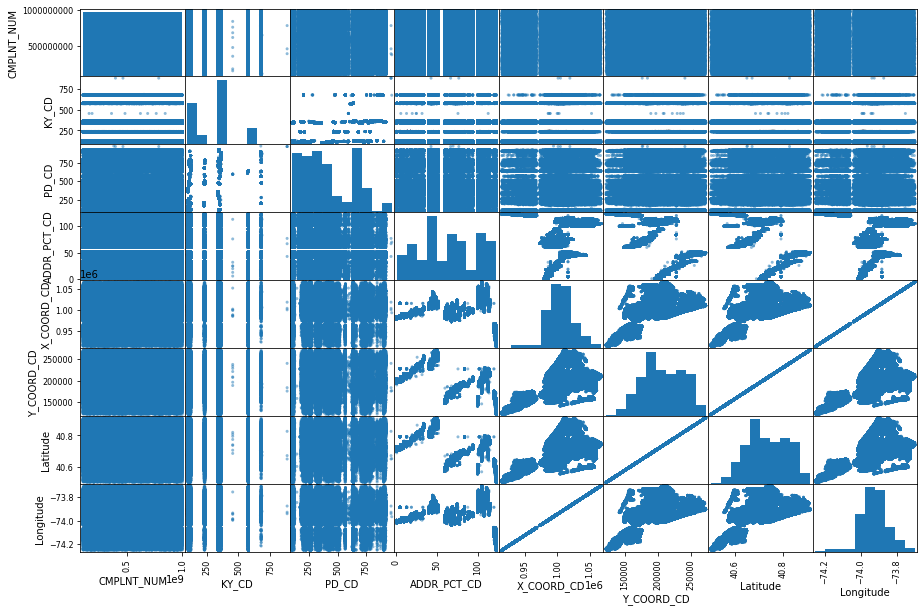

In [13]:
from pandas.plotting import scatter_matrix


ax = scatter_matrix(df,figsize=(15, 10))